In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## EDA

In [4]:
train

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [6]:
train.diabetes.value_counts()

0    400
1    214
Name: diabetes, dtype: int64

In [7]:
train.diabetes.value_counts()/len(train) * 100

0    65.14658
1    34.85342
Name: diabetes, dtype: float64

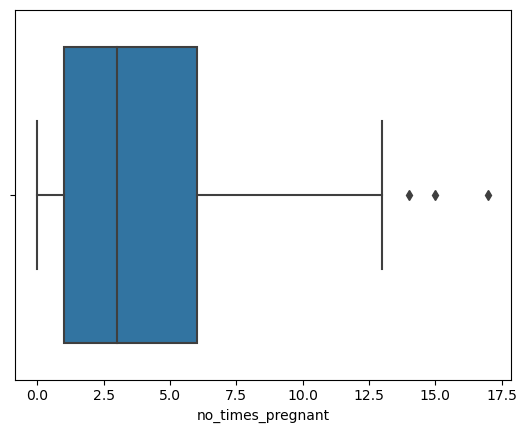

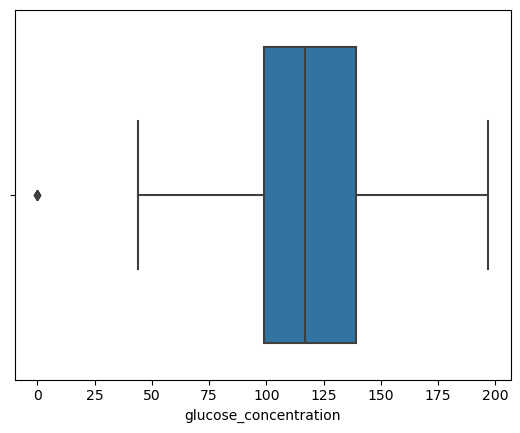

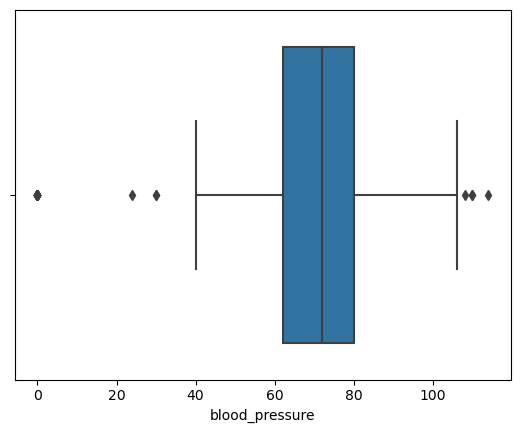

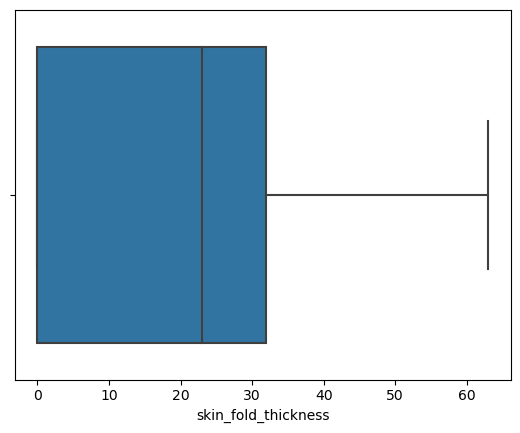

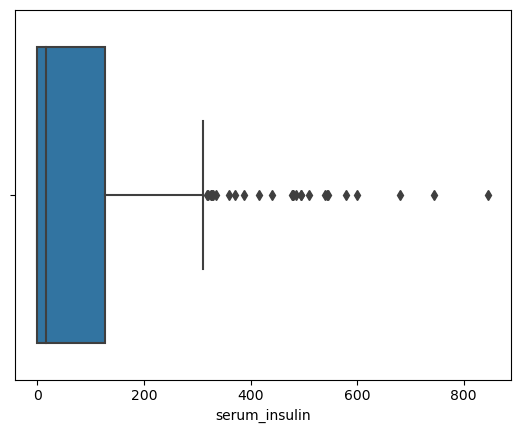

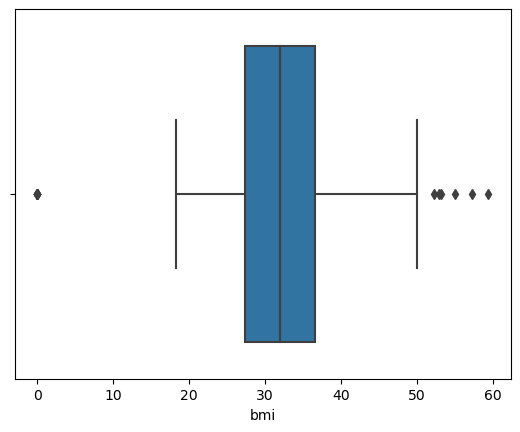

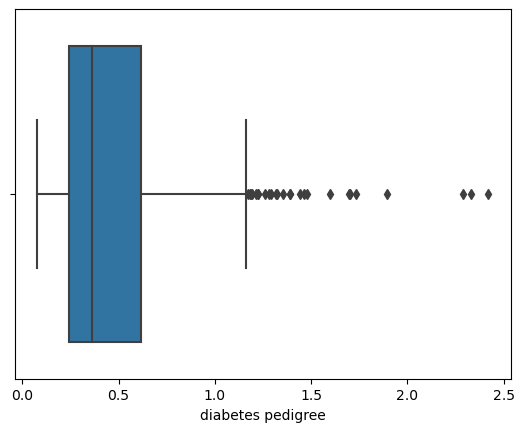

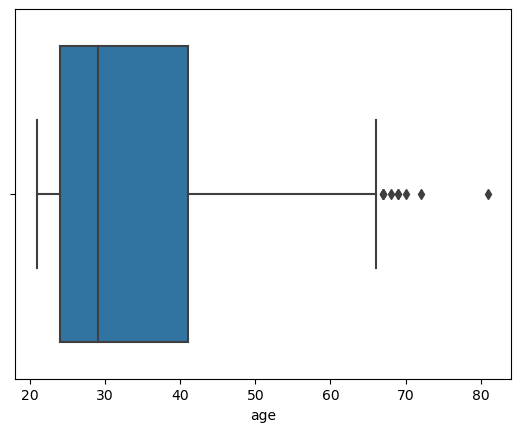

In [8]:
for i, predictor in enumerate(train.drop(columns = ['p_id', 'diabetes'])):
    plt.figure()
    sns.boxplot(x = train[predictor])

### Looking at the distribution of data in the boxplots, we can see the following:

+ no_times_pregnant: There are outliers that has been pregnant for more than 13 times.  

  
+ glucose_concentration: There are outliers of patients with 0 glucose concentration.  

  
+ blood_pressure: There are patients with 0 mmHg which does not make sense value wise.



+ skin_fold_thickness: There are no outliers observed based on the boxplot.



+ serum_insulin: There are quite alot of outliers observed in this boxplot. However from some reading, it is definitely possible to have insulin levels of 400 and above so there wont be a need to correct these outliers.



+ bmi: There are outliers with 50 and some patients have 0 bmi. Patients with more than 50 BMI are in the category of morbid obesity however there should not be any patients with 0 bmi.


+ diabetes pedigree: There are quite alot of outliers observed in this boxplot.


+ age: Most of the patients are in their 20s to 40s with some outliers of over 65 years old.

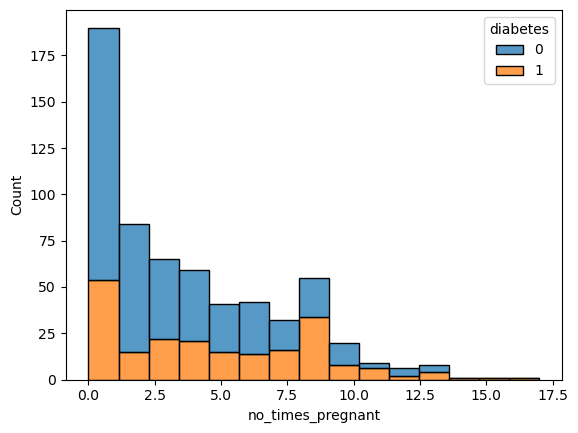

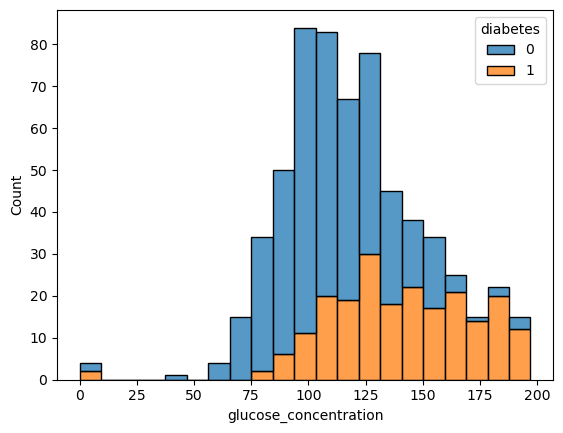

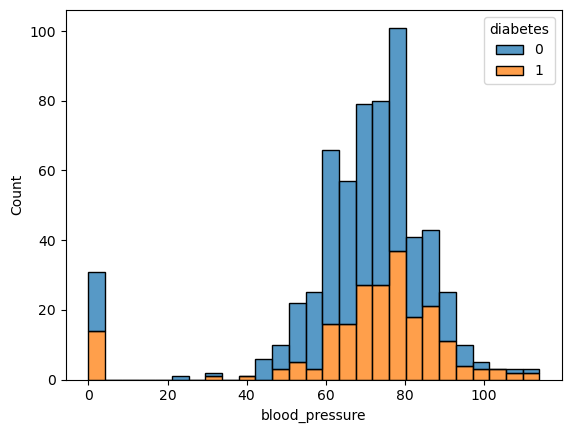

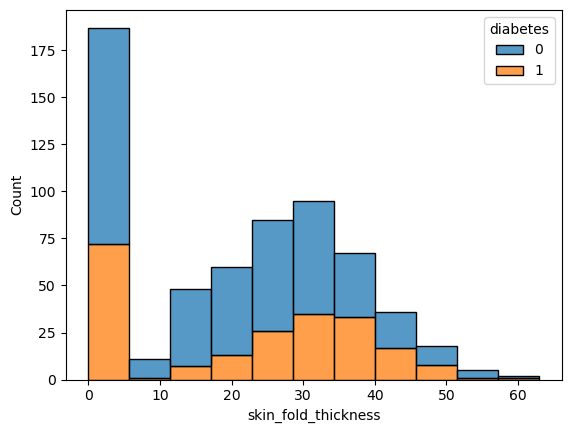

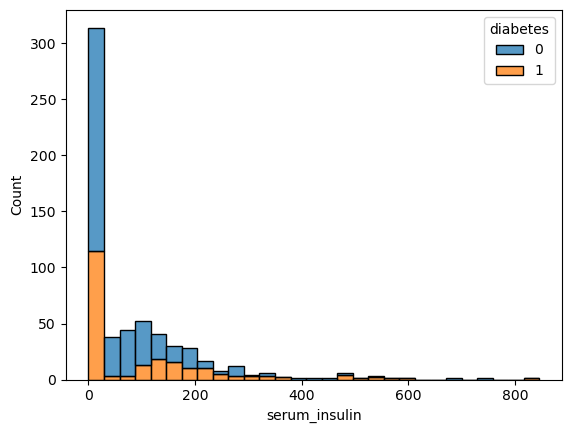

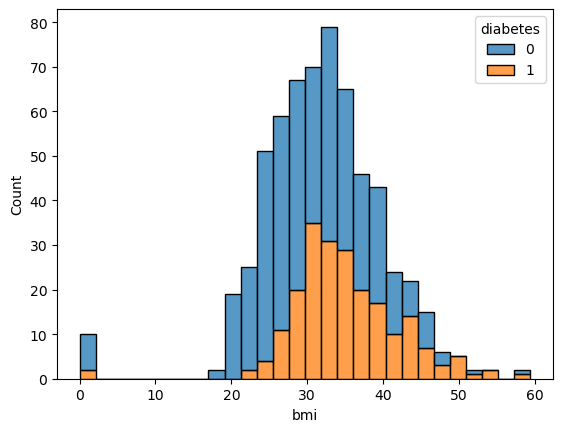

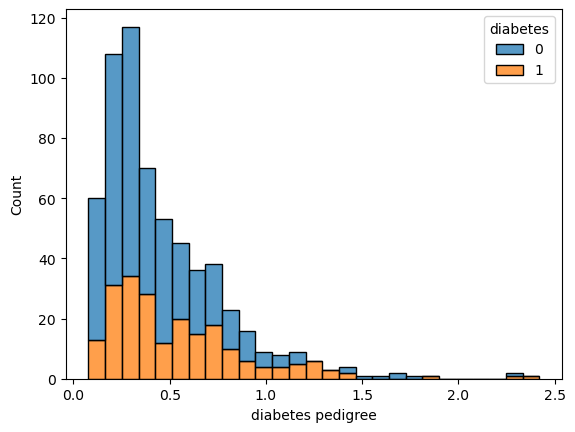

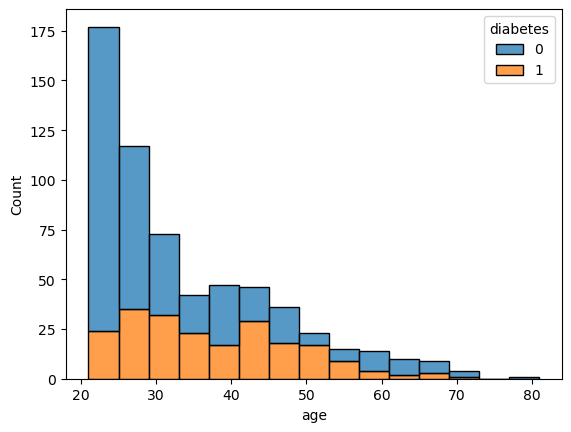

In [9]:
for i, predictor in enumerate(train.drop(columns = ['p_id', 'diabetes'])):
    plt.figure()
    sns.histplot(data = train, x = predictor, hue = 'diabetes', multiple = 'stack')

### Looking at the distribution of data in the barplots, we can see the following:

+ no_times_pregnant: The percentage of diabetic patients looks to be higher for patients that have been pregnant alot of times.

  
+ glucose_concentration: The percentage of diabetic patients are higher for patients with higher glucose concentration.

  
+ blood_pressure: Majority of the patients have blood pressure at the range of 60 to 80 mmHg. 


+ skin_fold_thickness: Majority of the patients have skin fold thickness of 0 mm. It does not make sense for measurement skin thickness measurement. This imply there are errors with the data. 



+ serum_insulin: Quick search shows that the average insulin levels could be around 2 to 20 mlU/mL.


+ bmi: Quite a few number of patients have 0 bmi. Besides that, people that are morbidly obese have a high percentage of getting diabetes.


+ diabetes pedigree: The percentage of diabetic patients seems to increase at bins with higher diabetes pedigree


+ age: The highest percentage of diabetic patient are at the bins of around 50 years. 

## Data Preprocessing

#### We would need to address columns with 0 values such as glucose concentration, blood pressure, skin fold thickness and bmi. To address this we will replace the 0 values with the average values of the columns. 

In [10]:
train['glucose_concentration'] = train['glucose_concentration'].replace(0, train['glucose_concentration'].mean())
train['blood_pressure'] = train['blood_pressure'].replace(0, train['blood_pressure'].mean())
train['skin_fold_thickness'] = train['skin_fold_thickness'].replace(0, train['skin_fold_thickness'].mean())
train['bmi'] = train['bmi'].replace(0, train['bmi'].mean())

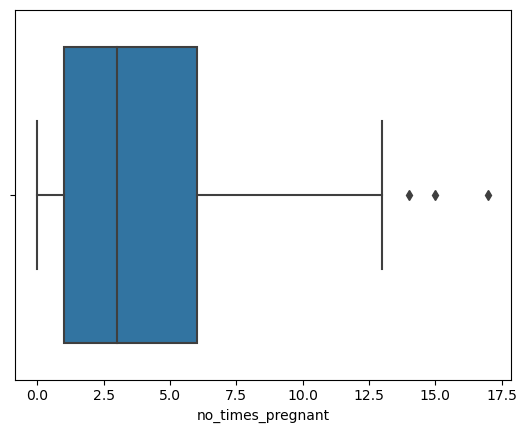

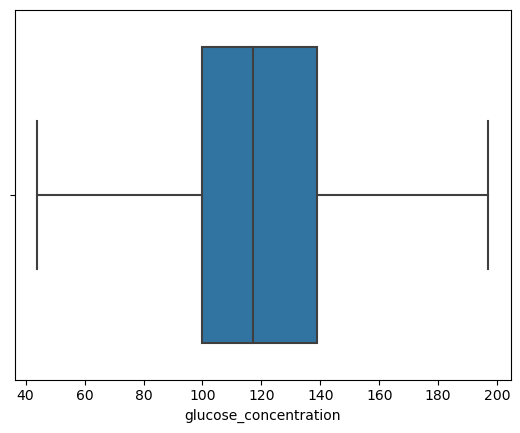

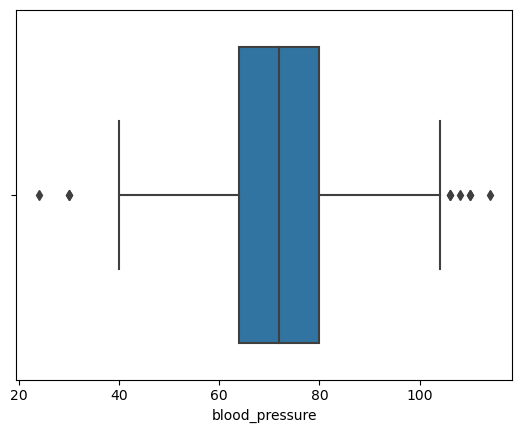

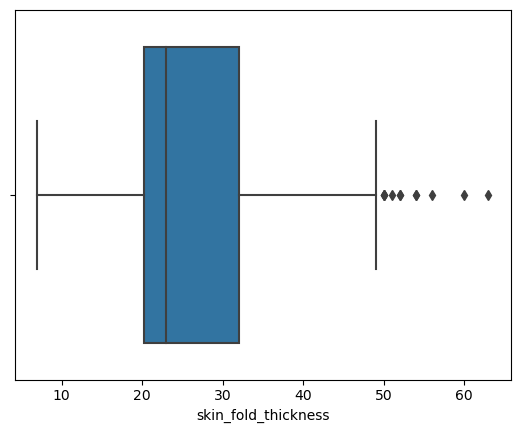

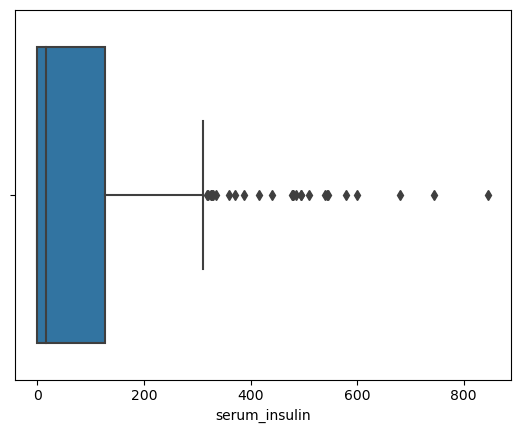

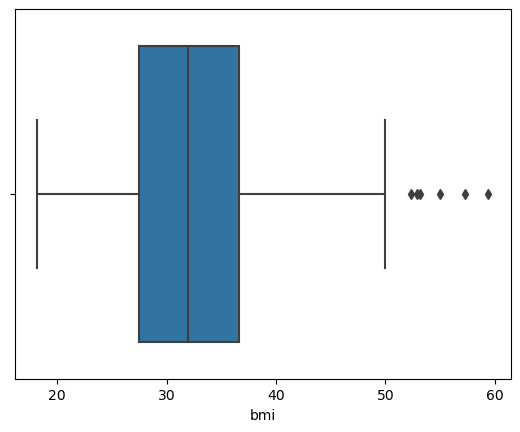

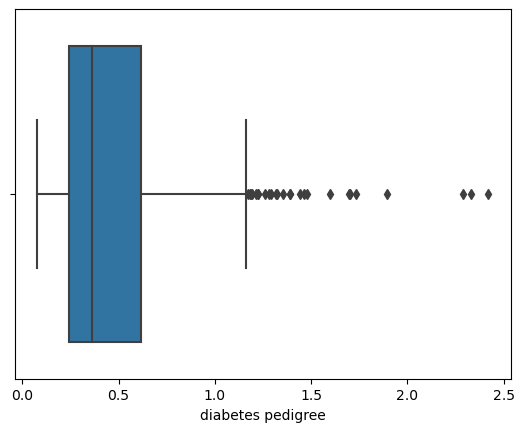

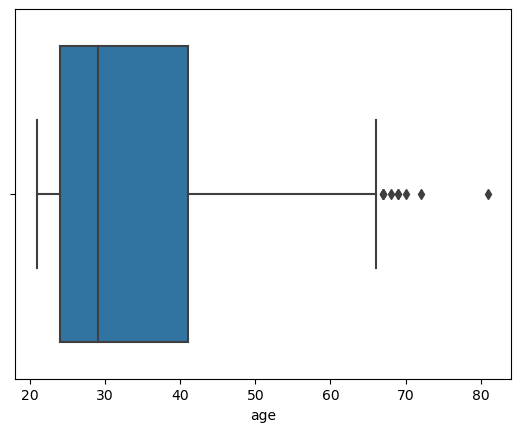

In [11]:
for i, predictor in enumerate(train.drop(columns = ['p_id', 'diabetes'])):
    plt.figure()
    sns.boxplot(x = train[predictor])

## Training the model

In [12]:
X = train.drop(['p_id', 'diabetes'], axis = 1)

In [13]:
y = train.diabetes.values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [15]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [16]:
X.columns

Index(['no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age'],
      dtype='object')

In [17]:
model_KNN = KNeighborsClassifier()
model_dt = DecisionTreeClassifier(random_state = 42)
model_rf = RandomForestClassifier(n_estimators = 200, random_state = 42)

model_list = [model_KNN, model_dt, model_rf]

#### Training with scaling

In [18]:
best_model = None
best_accuracy = 0

for i in model_list:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    model_accuracy = accuracy_score(y_test, y_pred)*100
    print(f'{i} has accuracy of {model_accuracy}')
    if model_accuracy > best_accuracy:
        best_model = i

best_model

KNeighborsClassifier() has accuracy of 77.92207792207793
DecisionTreeClassifier(random_state=42) has accuracy of 74.67532467532467
RandomForestClassifier(n_estimators=200, random_state=42) has accuracy of 79.87012987012987


RandomForestClassifier(n_estimators=200, random_state=42)

#### Training without scaling

In [19]:
best_model_scaled = None
best_accuracy_scaled = 0

for i in model_list:
    i.fit(X_train_sc, y_train)
    y_pred = i.predict(X_test_sc)
    model_accuracy = accuracy_score(y_test, y_pred)*100
    print(f'{i} has accuracy of {model_accuracy}')
    if model_accuracy > best_accuracy_scaled:
        best_model_scaled = i

best_model_scaled

KNeighborsClassifier() has accuracy of 78.57142857142857
DecisionTreeClassifier(random_state=42) has accuracy of 74.67532467532467
RandomForestClassifier(n_estimators=200, random_state=42) has accuracy of 79.22077922077922


RandomForestClassifier(n_estimators=200, random_state=42)

#### Testing the best model: RandomForestClassifier trained on unscaled data

In [20]:
test_data = test.drop(['p_id'], axis = 1)

In [21]:
test_data

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,12,140,85,33,0,37.4,0.244,41
1,6,102,90,39,0,35.7,0.674,28
2,7,97,76,32,91,40.9,0.871,32
3,7,179,95,31,0,34.2,0.164,60
4,6,87,80,0,0,23.2,0.084,32
...,...,...,...,...,...,...,...,...
149,0,129,110,46,130,67.1,0.319,26
150,1,199,76,43,0,42.9,1.394,22
151,2,88,74,19,53,29.0,0.229,22
152,0,126,84,29,215,30.7,0.520,24


In [22]:
model_rf.fit(X_train, y_train)
prediction = model_rf.predict(X_test)

In [23]:
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [24]:
print(np.sum(prediction == 0))
print(np.sum(prediction == 1))

110
44


### The model did quite a good job on unseen data as the prediction output has a similar distribution of about a third of the sample size predicted as diabetes patient similar to the train dataset